# Taller 5

Nicolás Andrés Valencia Contecha - 201426000

Diego Felipe Bryan Ospitia - 201425625

1. [** Introducción al análisis de imagen **](#primero)
2. [** Determinación radio y centroide vesicula **](#segundo)
    3. [** Reduciendo el ruido **](#tercero)
3. [** Granulometría **](#cuarto)
    4. [** Ejemplo monedas **](#quinto)
    5. [** Material desconocido e hierro nodular **](#sexto)
    6. [** Imagen de granos definidos **](#septimo)

In [67]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


## Introducción al análisis de imagen<a name="primero"></a>

Para familiarizarse con el tema, se procede a analizar una imagen de la librería misc

In [68]:
#misc.face es una función del sistema que tiene la imagen de un mapache 
face = misc.face()

Una vez se tiene la imagen, se determinan las propeidades de la misma (tamaño vertical, tamaño horizontal y código RGB)

In [69]:
#Las imagenes tienen forma [Tamaño vertical, Tamaño horizontal, codigo RGB]
face.shape

(768, 1024, 3)

El comando mostrado a continuación indica el tipo de datos que se están manejando.

In [70]:
#Tipo de dato manejado
face.dtype

dtype('uint8')

Con el comando imshow se muestra la imagen.

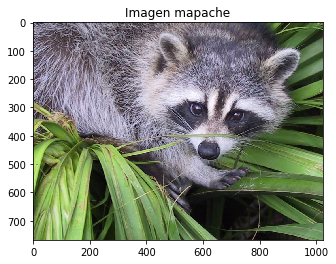

In [71]:
#El mapache
plt.imshow(face)
title('Imagen mapache')
show()

In [72]:
#Función que guarda las imagenes procesadas
misc.imsave('face.png', face)

El comando anterior guarda la imagen en la carpeta trabajada. Como se muestra en la siguiente celda, es posible recortar la imagen de la misma manera que se hace con un arreglo.

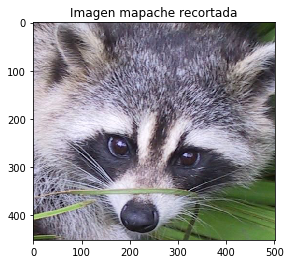

In [73]:
#Función para recortar imagen
recortada = face[50:501,400:901,:]
plt.imshow(recortada)
title('Imagen mapache recortada')
show()

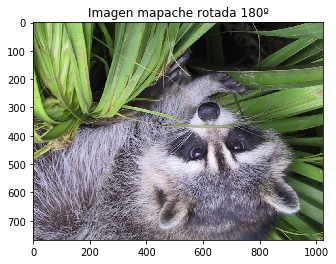

In [74]:
#Función para voletar la imagen de pies a cabeza
volteada = flipud(face)
plt.imshow(volteada)
title('Imagen mapache rotada 180º')
show()

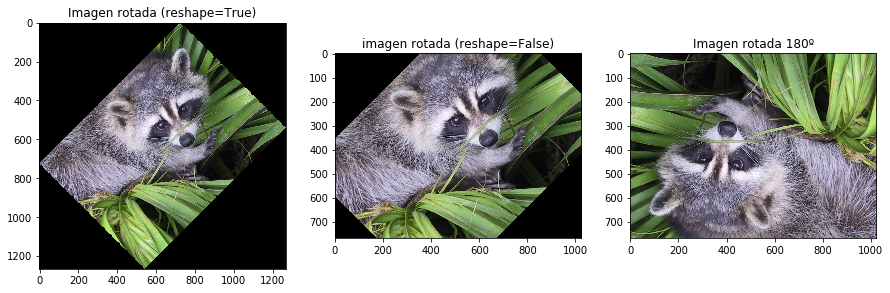

In [75]:
#Función para rotar imagen 
r45 = ndimage.rotate(face,45) #rota 45º la imagen con reshape True por default
r45NR = ndimage.rotate(face,45,reshape=False) #rota la imagen 45º sin reshape
r180 = ndimage.rotate(face,180) #rota la imagen 180º
plt.subplots(figsize=(15,15))
plt.subplot(131)
plt.imshow(r45)
title('Imagen rotada (reshape=True)')
plt.subplot(132)
plt.imshow(r45NR)
title('imagen rotada (reshape=False)')
plt.subplot(133)
plt.imshow(r180)
title('Imagen rotada 180º')
show()

Los comandos anteriores muestran también distintas funciones que permiten rotar las imagenes en diferentes direcciones, así como reescalarla para que quepa dentro del marco. En la ilustración central se observa el efecto de no usar reshape. 

A continuación, se muestra el primer filtro analizado, el gaussiano. Los parámetros de entrada son la imagen y la amplitud del rango de valores que filtra (desviación estándar). Entonces, al tomar valores de sigma mayores, la imagen se torna borrosa. La imagen a la izquierda muestra el efecto de usar sólo un parámetro de sigma, tomando todos los RGB en uno sólo. Por otro lado, la de la derecha usa una entrada de tres valores de sigma. 

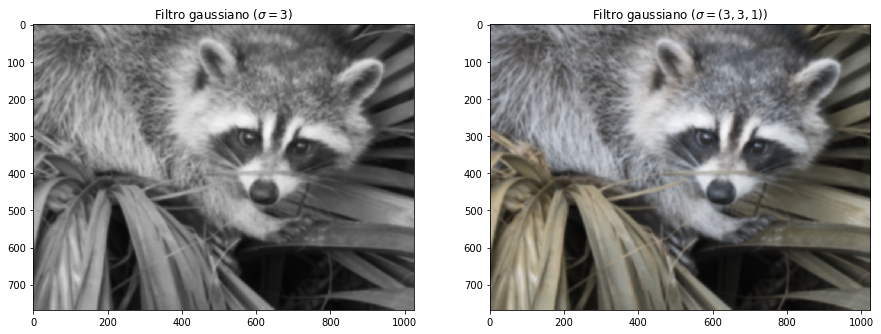

In [76]:
blurred_face = ndimage.gaussian_filter(face, sigma=3) #primer filtro gaussiano
blurred_face_tres = ndimage.gaussian_filter(face, sigma=(3, 3, 1)) #Filtro gaussiano con tres entradas de sigma
plt.subplots(figsize=(15,15))
plt.subplot(121)
plt.imshow(blurred_face)
title('Filtro gaussiano ($\sigma=3$)')
plt.subplot(122)
plt.imshow(blurred_face_tres)
title('Filtro gaussiano ($\sigma=(3,3,1)$)')
show()

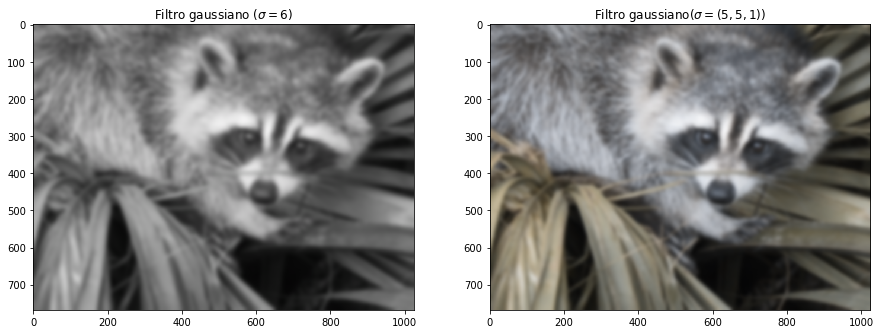

In [77]:
very_blurred_face = ndimage.gaussian_filter(face, sigma=6) #filtro gaussiano 
very_blurred_face_tres = ndimage.gaussian_filter(face, sigma=(5, 5, 1)) #filtro gaussiano
plt.subplots(figsize=(15,15))
plt.subplot(121)
plt.imshow(very_blurred_face)
title('Filtro gaussiano ($\sigma=6$)')
plt.subplot(122)
title('Filtro gaussiano($\sigma=(5,5,1)$)')
plt.imshow(very_blurred_face_tres)
show()

Las imagenes anteriores presentan los diferentes resultados que se pueden obtener con el filtro gaussiano, dependiendo de los valores aplicados de sigma. Ahora, se prueba el filtro uniforme. Este tiene como parámetro de entrada la imagen y el tamaño del filtro deseado. De igual forma que el anterior, es posible tener una entrada de tres valores RGB. La principal diferencia observada con el filtro gaussiano es que, a valores de sigma bajos, la imagen se encuentra ya en escala de grises una vez se realiza el filtrado mientras que, para el caso del uniforme, se eliminan algunas componentes de color, dejando otras sin modificar, como se observa en la imagen izquierda.  

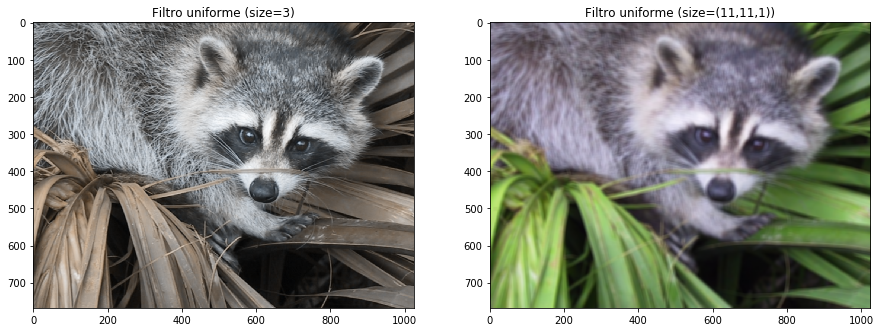

In [78]:
local_mean_face = ndimage.uniform_filter(face, size=3) #primer filtro uniforme
local_mean_face_tres = ndimage.uniform_filter(face, size=(11, 11, 1)) #segundo filtro uniforme
plt.subplots(figsize=(15,15))
plt.subplot(121)
title('Filtro uniforme (size=3)')
plt.imshow(local_mean_face)
plt.subplot(122)
plt.imshow(local_mean_face_tres)
title('Filtro uniforme (size=(11,11,1))')
show()

Ahora, se estiudia el filtro Sobel. para esto, se genera una imagen de un cuadrado con base en un arreglo de zeros, modificando los valores en los puntos deseados, como se observa en la siguiente línea de código. Teniendo esto, se aplica el filtro sobel, para el cual se tiene de entrada la imagen y el eje de la misma sobre el cual se desea aplicar el filtro.

In [79]:
from skimage import feature

In [80]:
im = zeros((256,256)) #Arreglo de zeros base de imagen
im[64:-65,64:-65] = 2 #se modifican los rangos mostrados para obtener figura de cuadrado

im = ndimage.gaussian_filter(im,3) #Aplicación de filtro gaussiano

sobverti = ndimage.sobel(im,axis=0) #Se aplica filtro sobre eje vertical
sobhori = ndimage.sobel(im,axis=1) #Se aplica filtro sobre eje horizontal
sob = np.hypot(sobhori,sobverti) #Retorna la hipotenusa de los dos valores de entrada

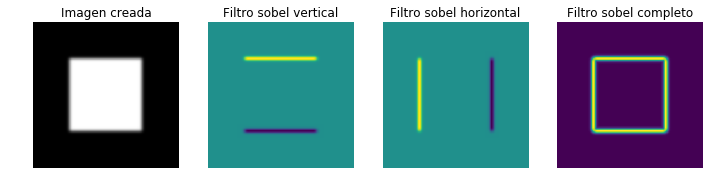

In [81]:
plt.subplots(figsize=(12,50))
plt.subplot(141)
plt.imshow(im,cmap=plt.cm.gray) #transformación de la imagen a escala de grises
title('Imagen creada')
plt.axis('off')
plt.subplot(142)
plt.imshow(sobverti)
title('Filtro sobel vertical')
plt.axis('off')
plt.subplot(143)
plt.imshow(sobhori)
title('Filtro sobel horizontal')
plt.axis('off')
plt.subplot(144)
plt.imshow(sob)
title('Filtro sobel completo')
plt.axis('off')
plt.show()

Como se observa en la primera imagen anterior, por medio de los primeros comandos mencionados es posible crear una imagen con la figura deseada. Esta es pasada a escala de grises para después aplicarle cada uno de los filtros mencionados. Se aprecia en las siguientes dos figures el efecto del filtro vertical y horizontal, respectivamente. El primero detecta los cambios en color y los suaviza, dejando sólo las lineas horizontales. Lo anterior se da de manera análoga para el horizontal, en donde quedan las lineas verticales.

Habiendo observado el efecto cuando la imagen está alineada con los ejes, ahora se rota la misma y se realiza el mismo procedimiento anterior para observar la efectividad del filtro para este caso.

In [82]:
imr = ndimage.rotate(im,15) #se rota la imagen 15º

sobvertir = ndimage.sobel(imr,axis=0) #Aplicación de filtro sobre eje vertical
sobhorir = ndimage.sobel(imr,axis=1) #Aplicación de filtro sobre eje horizontal
sobr = np.hypot(sobhorir,sobvertir) #cálculo de la hipotenusa de los dos filtros anteriores

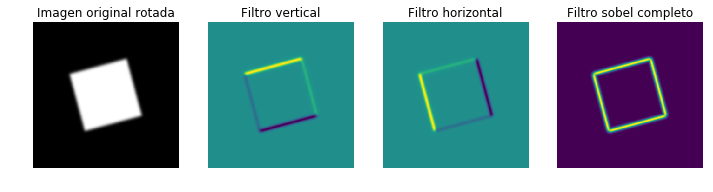

In [83]:
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(imr,cmap=plt.cm.gray)
title('Imagen original rotada')
plt.axis('off')
plt.subplot(142)
plt.imshow(sobvertir)
title('Filtro vertical')
plt.axis('off')
plt.subplot(143)
title('Filtro horizontal')
plt.imshow(sobhorir)
plt.axis('off')
plt.subplot(144)
title('Filtro horizontal')
plt.imshow(sobr)
title('Filtro sobel completo')
plt.axis('off')
plt.show()

Se observa ahora que, al estar rotada la imagen, se siguen observando todos los bordes, lo cual se observa para cada uno de los ejes. La suavización no se realiza con la misma efectividad que cuando la imagen se encuentra alineada con los ejes por los cuales se aplicará el filtro. 

Ahora, se le agrega ruido a la imagen para determinar de qué manera afecta esto el filtro sobel.

In [84]:
imn = imr + 0.25*np.random.random(imr.shape) #Adición de ruido aleatorio a la imagen original
#Aplicación de filtros
sobvertin = ndimage.sobel(imn,axis=0)
sobhorin = ndimage.sobel(imn,axis=1)
sobn = np.hypot(sobhorin,sobvertin)

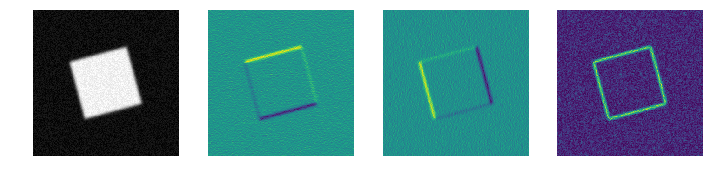

In [85]:
#Graficación de filtros
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(imn,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(sobvertin)
plt.axis('off')
plt.subplot(143)
plt.imshow(sobhorin)
plt.axis('off')
plt.subplot(144)
plt.imshow(sobn)
plt.axis('off')
plt.show()

# EASTER EGG (PARA SER ENCONTRADO POR DIEGO): no veo diferencia con lo anterior sin el ruido, sólo puntitos.

Ahora, se estudia el filtro Canny. Este es el paso preliminar para usar la transformada de Hough. Este detecta los bordes de la imagen de entrada. Entre mayor sea el ruido de la misma, mayor debe ser el valor de $\sigma$ para lograr identificar los bordes, de lo contrario, parte del ruido pasará por el filtro.

In [86]:
# Filtro Canny para dos valores de sigma
canny1 = feature.canny(imr) #Sigma = 1
canny3 = feature.canny(imr, sigma=3)

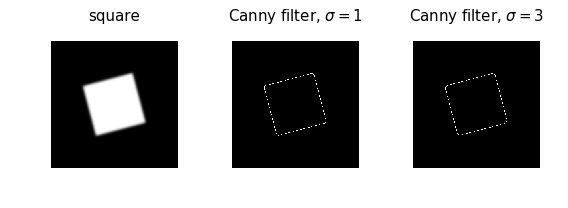

In [87]:
# Graficación de resultados.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
ax1.imshow(imr, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(canny1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(canny3, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

En este caso no se observa diferencia entre los dos valores de $\sigma$ usados ya que la imagen de entrada no presenta ruido. Ahora, se realiza el mismo procedimiento para la imagen que sí cuenta con ruido, utlizando los dos mismos parámetros de entrada recién usados.

In [88]:
# Compute the Canny filter for two values of sigma
canny1n = feature.canny(imn) #Sigma = 1
canny3n = feature.canny(imn, sigma=3)

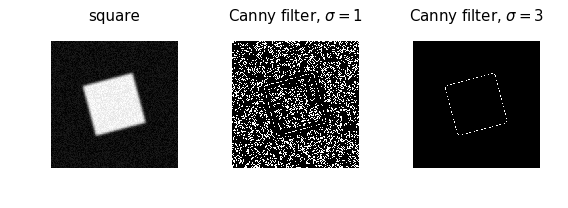

In [89]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
ax1.imshow(imn, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(canny1n, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(canny3n, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

Como fue mencionado anteriormente, el bajo valor de $\sigma$ permite que parte del ruido pase por el filtro, obteniendo una imagen final sin que los bordes deseados sean claramente identificados. Sin embargo, al aumentar a 3 su valor, se llega al mismo resultado que se mostró antes, en donde ya se elimina el ruido y se obtienen sólo los bordes definidos en la imagen original.

Una vez se tiene la imagen filtrada, con sus bordes definidos, se procede a realizar la transformada de hough de la misma. 

In [90]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

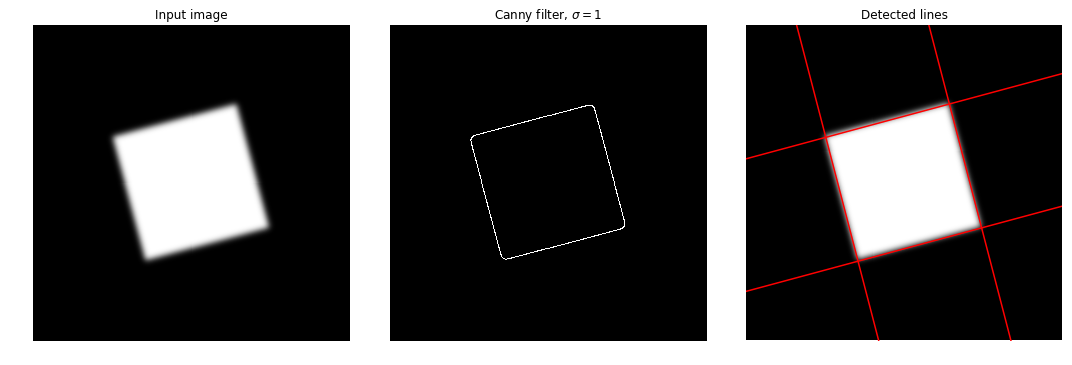

In [92]:
h,  theta, d = hough_line(canny1) #Transformada de linea de hough

fig, axes = plt.subplots(1,3, figsize = (15,6))
ax = axes.ravel()

ax[0].imshow(imr, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(canny1, cmap=cm.gray)
ax[1].set_title('Canny filter, $\sigma = 1$')
ax[1].set_axis_off()

ax[2].imshow(imr, cmap=cm.gray)
#Transformación de coordenadas y grafiación de lineas detectadas
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - imr.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, imr.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, imr.shape[1]))
ax[2].set_ylim((imr.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')
plt.tight_layout()
plt.show()


Como se observa en las imagenes anteriores, cada una de ellas representa un "paso" para realizar la transformada de hough. Se tiene, primero, la imagen en escala de grises, luego se toman los bordes con el filtro Canny y, finalmente, se detectan las lineas mediante la transformada.

Este proceso puede ser aplicado, de igual manera, a figuras circulares, como se observa ahora. Se utiliza, en este caso, la transformada circular de hough. Se analiza una imagen de una vesicula con la finalidad de determinar su radio y centroide.

## Determinación radio y centroide vesicula<a name="segundo"></a>

In [94]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage import data, color
from skimage.draw import circle_perimeter

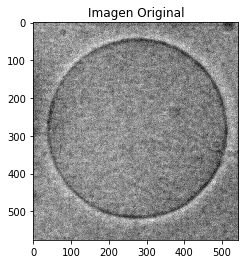

In [95]:
#Se carga la imagen
Im1 = pylab.imread("ves_full_150_002.jpg")
#Se quita la componente RGB
Im1 = Im1[:,:,0]
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

Teniendo la imagen a escala de grises, se le aplica el filtro Canny para la detección del borde deseado.

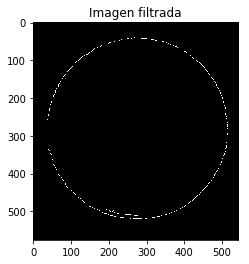

In [113]:
bordes = feature.canny(Im1, sigma = 2, low_threshold=10, high_threshold=78)
plt.imshow(bordes)
title('Imagen filtrada')
show()

El borde detectado es lo suficientemente adecuado para la aplicación de la transformada. Para esto, se crea un arreglo con una estimación del rango en el cual se encuentra el radio. En este caso, se toma que se encuentra entre 200 y 300. Teniendo este arreglo, se realiza la transformada usando como parámetros de entrada la imagen recién filtrada y el rango de radios.

In [97]:
# Detect two radii
hough_radii = np.arange(200, 300, 2)
hough_res = hough_circle(bordes, hough_radii)

Una vez se tiene la transformada, se selecciona el circulo que más veces se repite, por medio de la función mostrada en la siguiente línea de código. El resultado de esto es el centroide tanto en x como en y, así como el radio que corresponde al del círculo mencionado.

In [104]:
# Select the most prominent circle
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

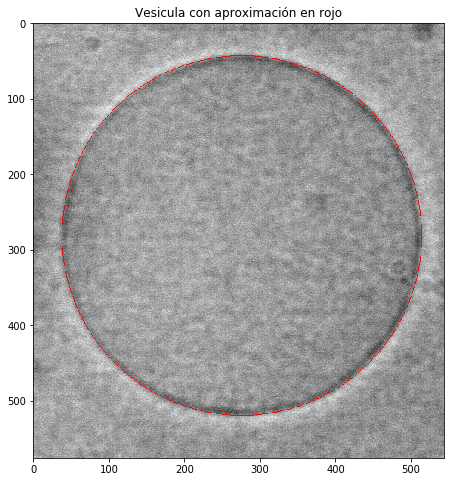

El radio promedio encontrado fue de 238 y su posición en (276,281)


In [115]:
# grafiación círculo
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
Imf = color.gray2rgb(Im1)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    Imf[circy, circx] = (220, 20, 20) #Cambia el color de los puntos en el perimetro del circulo
    Imf[center_y, center_x] = (220,20,20) #Cambia el color del centro del circulo

ax.imshow(Imf, cmap=plt.cm.gray)
title('Vesicula con aproximación en rojo')
plt.show()
print('El radio promedio encontrado fue de %.0f y su posición en (%.0f,%.0f)' %(radii,cx,cy))

Como se aprecia en la imagen superior, el proceso realizado aproxima de manera precisa la posición y el radio de la vesicula. Se concluye, entonces, que este método es adecuado para este tipo de análisis, para cuando la imagen es un círculo claramente definido.

Ahora, se prueban un filtro diferente para comparar los resultados obtenidos.

## Reduciendo el ruido<a name="tercero"></a>

Se prueba aplicar un filtro uniforme a la imagen antes de pasarla por el Canny. Lo anterior con la finalidad de reducir el ruido que se tiene en la imagen original y que la detección de los bordes se realice con mayor exactitud.

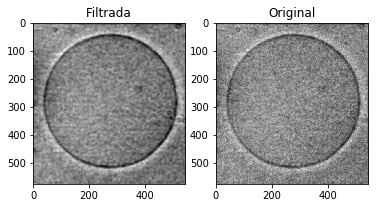

In [119]:
# Como Im1 es de grises, entonces:
filtrada = ndimage.uniform_filter(Im1, size=3.8)
bordesf = feature.canny(filtrada, sigma = 2, low_threshold=10, high_threshold=78)
subplot(121)
imshow(filtrada, cmap=plt.cm.gray)
title('Filtrada')
subplot(122)
imshow(Im1, cmap=plt.cm.gray)
title('Original')
show()

Se evidencia una leve mejoría de la imagen. El círculo se resalta un poco más que cuando no se tiene el filtro. Se procede ahora a realizar la detección de bordes.

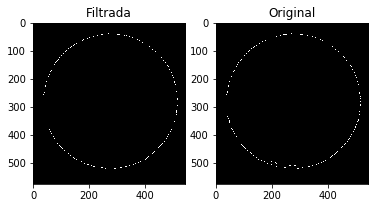

In [120]:
subplot(121)
imshow(bordesf)
title('Filtrada')
subplot(122)
imshow(bordes)
title('Original')
show()

La mejoría descrita anteriormente deriva en la diferencia entre las dos imagenes presentadas. La filtrada muestra una circuenferncia más definida que la original, la cual, en la parte inferior, presenta líneas adentro del círculo, lo cual puede resultar en una detección de radios no adecuada. Se continúa el proceso realizando la transformada.

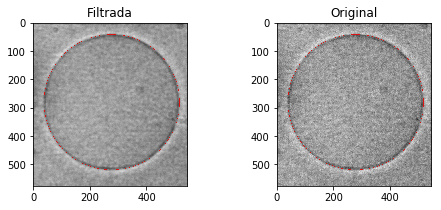

In [130]:
# Detect two radii
hough_radiif = np.arange(200, 300, 2)
hough_resf = hough_circle(bordesf, hough_radiif)

# Select the most prominent circle
accumsf, cxf, cyf, radiif = hough_circle_peaks(hough_resf, hough_radiif,
                                           total_num_peaks=1)

## Draw them
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 3))
Imff = color.gray2rgb(filtrada)
for center_yf, center_xf, radiusf in zip(cyf, cxf, radiif):
    circyf, circxf = circle_perimeter(center_yf, center_xf, radiusf)
    Imff[circyf, circxf] = (220, 20, 20) #Cambia el color de los puntos en el perimetro del circulo
    Imff[center_yf, center_xf] = (220,20,20) #Cambia el color del centro del circulo

ax[0].imshow(Imff, cmap=plt.cm.gray)
ax[0].set_title('Filtrada')
ax[1].imshow(Imf, cmap=plt.cm.gray)
ax[1].set_title('Original')
plt.show()

In [131]:
print('El radio promedio encontrado con el filtro fue de %.1f y su posición en (%.0f,%.0f)' %(radii,cx,cy))
print('El radio promedio encontrado sin filtro fue de %.1f y su posición en (%.0f,%.0f)' %(radiif,cxf,cyf))

El radio promedio encontrado con el filtro fue de 238.0 y su posición en (276,281)
El radio promedio encontrado sin filtro fue de 238.0 y su posición en (276,281)


Aunque en la imagen centrada se observa con más claridad el círculo, el resultado final es el mismo al que se llega sin el previo uso del filtro. Lo anterior puede darse debido a que, aunque la imagen se mejora con este proceso, en la original sigue siendo visible la vesicula con el ruido. Es probable que la aplicación de este tipo de filtros sea más apropiada para imagenes en las cuales no se tenga claridad del objetivo o los objetivos a identificar.

## Granulometría<a name="cuarto"></a>

Se estudia, ahora, el uso de la transformada watershed. Primero, se analiza un ejemplo sencillo para después realizar el mismo procedimiento a una imagen de una metalografía. Para esto, se usa la extensión de python OpenCV.

In [45]:
import cv2

### Ejemplo monedas <a name="quinto"></a>

Primero, se inicia con la busqueda de un estimado de de las monedas que se observan más adelante. Para esto, se binzariza la imagen, dando como resultado la aproximación en blanco y negro.

(-0.5, 261.5, 314.5, -0.5)

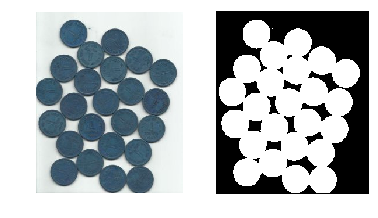

In [46]:
img = cv2.imread('coins.PNG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
subplot(121)
imshow(img)
axis('off')
subplot(122)
imshow(thresh)
axis('off')


Teniendo este resultado, se procede a remover el ruido que quedó en la imagen derecha, para lo cual se usa "morphological opening". Una vez se realiza esto, se separan las zonas que se tiene seguridad que son "background" y "foreground", siendo el último donde se encuentran las monedas. Para el primer caso se usa una función de dilatación, la cual aumenta la diferencia entre lo que se entiende como "background" y los bordes. Para determinar con seguridad lo que es moneda, se usa una transformada de distancia. Finalmente, queda lo que no se sabe si es "foreground" o "background". Esta zona se obtiene restando los resultados de la transformada de distancia y la dilatación. 

In [47]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
notsure = cv2.subtract(sure_bg,sure_fg)

(-0.5, 261.5, 314.5, -0.5)

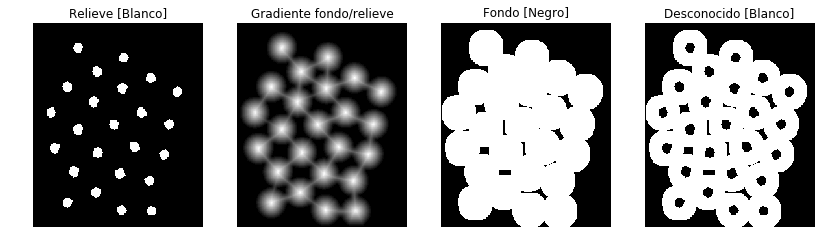

In [48]:
figure(figsize=(14,14))
subplot(141)
imshow(sure_fg)
title('Relieve [Blanco]')
axis('off')
subplot(142)
imshow(dist_transform)
title('Gradiente fondo/relieve')
axis('off')
subplot(143)
imshow(sure_bg)
title('Fondo [Negro]')
axis('off')
subplot(144)
imshow(notsure)
title('Desconocido [Blanco]')
axis('off')

Las imagenes mostradas en la parte superior muestran los resultados del proceso descrito anteriormente. La primera corresponde a lo que es seguro que es moneda (foreground), la segunda muestra el resultado de la transformada de distancia, la cual da como resultado la imagen anterior. La tercera es el background mientras que, la última, corresponde a la diferencia entre foreground y background, es decir, el área desconocida.

Ahora, se le asigna un tipo de marcador a cada una de las zonas indicadas. Para esto, se usa la función connectedComponents, la cual asigna un marcador de $0$ al background, aumentando el valor para los demás objetos. En estre caso, se desea que la zona que no es segura sea designada con cero, por lo que, en la siguiente línea de código, se le asigna a la misma este valor y se le adiciona 1 al marcador que por default le es asignado al background.

In [49]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[notsure==255] = 0


Finalmente, teniendo los marcadores de la manera recién descrita, se realiza la transformada Watershed, usando como parámetros de entrada la imagen original y los marcadores modificados. 

(-0.5, 261.5, 314.5, -0.5)

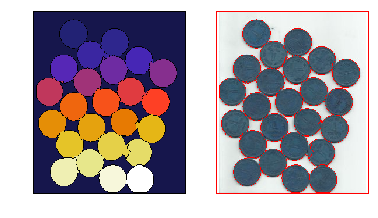

In [50]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
subplot(121)
imshow(markers,cmap = 'CMRmap')
axis('off')
subplot(122)
imshow(img)
axis('off')


Se observa que la aproximación final es bastante precisa, con algunas secciones donde se tocan las monedas segmentadas de manera adecuada, mientras que para otras no.

Se realizará el mismo procedimiento para las metalografías mostradas adelante.

### Material desconocido e hierro nodular<a name="sexto"></a>

Text(0.5,1,'Imagen Original')

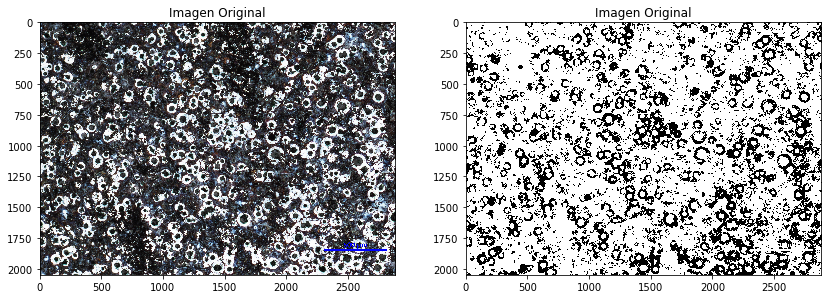

In [51]:
hierro = cv2.imread("FeNod_50X_L.tif")
hgris = cv2.cvtColor(hierro,cv2.COLOR_BGR2GRAY)
reth, threshh = cv2.threshold(hgris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
unknown = cv2.imread("200x_1010_T.tif")
ugris = cv2.cvtColor(unknown,cv2.COLOR_BGR2GRAY)
retu, threshu = cv2.threshold(ugris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#print imagen
figure(figsize=(14,14))
subplot(121)
pylab.imshow(hierro, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
subplot(122)
pylab.imshow(threshh, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)


La imagen izquierda muestra la metalografía a estudiar (hierro nodular), mientras que la derecha muestra el resultado de la binarización de Otzu. Lo anterior se repite para la segunda imagen, de material desconocido.

Text(0.5,1,'Imagen Original')

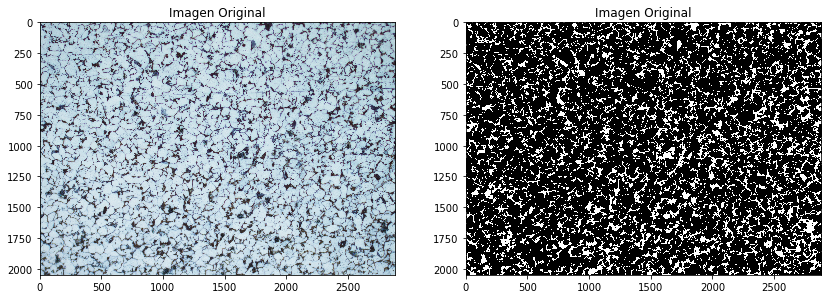

In [52]:
figure(figsize=(14,14))
subplot(121)
pylab.imshow(unknown, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
subplot(122)
pylab.imshow(threshu, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)

Se remueve el ruido y se determinan las zonas de "foreground", "backfround" y la desconocida de la misma manera explicada anteriormente para la imagen de material desconocido.

In [53]:
# noise removal
kernelu = np.ones((2,2),np.uint8)
openingu = cv2.morphologyEx(threshu,cv2.MORPH_OPEN,kernelu, iterations = 3)
# sure background area
sure_bgu = cv2.dilate(openingu,kernelu,iterations=3)
# Finding sure foreground area
dist_transformu = cv2.distanceTransform(openingu,cv2.DIST_L2,5)
ret, sure_fgu = cv2.threshold(dist_transformu,0.007*dist_transformu.max(),255,0)
# Finding unknown region
sure_fgu = np.uint8(sure_fgu)
notsureu = cv2.subtract(sure_bgu,sure_fgu)

(-0.5, 2879.5, 2047.5, -0.5)

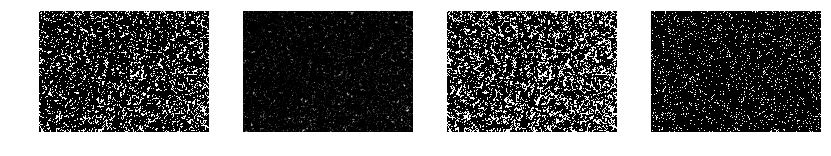

In [54]:
figure(figsize=(14,14))
subplot(141)
imshow(sure_fgu)
axis('off')
subplot(142)
imshow(dist_transformu)
axis('off')
subplot(143)
imshow(sure_bgu)
axis('off')
subplot(144)
imshow(notsureu)
axis('off')

A diferencia del ejemplo de las monedas, las diferentes zonas no se distinguen con claridad, lo cual puede derivarse en la inapropiada aplicación de los marcadores y un resultado inadecuado de la transformada Watershed. 

Se remueve el ruido y se determinan las zonas de "foreground", "backfround" y la desconocida de la misma manera explicada anteriormente para la imagen de hierro nodular.

In [55]:
# noise removal
kernelh = np.ones((3,3),np.uint8)
openingh = cv2.morphologyEx(threshh,cv2.MORPH_OPEN,kernelh, iterations = 2)
# sure background area
sure_bgh = cv2.dilate(openingh,kernelh,iterations=3)
# Finding sure foreground area
dist_transformh = cv2.distanceTransform(openingh,cv2.DIST_L2,5)
ret, sure_fgh = cv2.threshold(dist_transformh,0.005*dist_transformh.max(),255,0)
# Finding unknown region
sure_fgh = np.uint8(sure_fgh)
notsureh = cv2.subtract(sure_bgh,sure_fgh)

In [56]:
# Marker labelling
retu, markersu = cv2.connectedComponents(sure_bgu)
# Add one to all labels so that sure background is not 0, but 1
markersu = markersu+1
# Now, mark the region of unknown with zero
markersu[notsureu==255] = 0

Se aplican los marcadores y se realiza la transformada para la imagen de material desconocido.

(-0.5, 2879.5, 2047.5, -0.5)

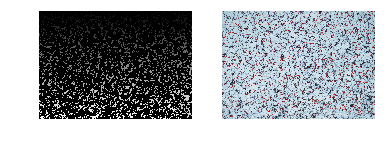

In [57]:
markersu = cv2.watershed(unknown,markersu)
unknown[markersu == -1] = [255,0,0]
subplot(121)
imshow(markersu)
axis('off')
subplot(122)
imshow(unknown)
axis('off')

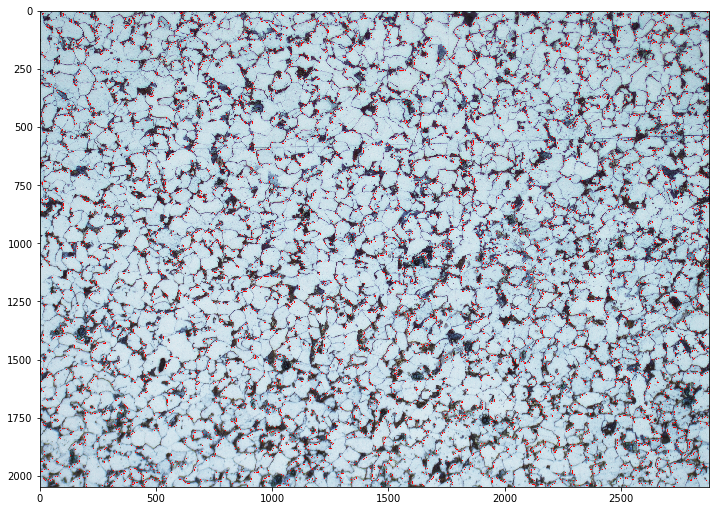

In [58]:
figure(figsize=(12,12))
imshow(unknown)

Como se observa en la imagen, la transformada Watershed no muestra resultados adecuados, debido a la complejidadde la imagen. Las siguientes graficas muestran el mismo procedimiento pero para la imagen de hierro nodular.

(-0.5, 2879.5, 2047.5, -0.5)

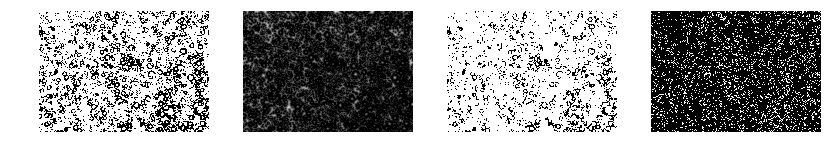

In [59]:
figure(figsize=(14,14))
subplot(141)
imshow(sure_fgh)
axis('off')
subplot(142)
imshow(dist_transformh)
axis('off')
subplot(143)
imshow(sure_bgh)
axis('off')
subplot(144)
imshow(notsureh)
axis('off')

Aunque la distinción en cada área es mejor que para el caso anterior, aún no se realiza una clara distinción entre los granos y lo que se desea sea background. A continuación se adicionan los marcadores y se realiza la transformada.

In [60]:
# Marker labelling
reth, markersh = cv2.connectedComponents(sure_bgh)
# Add one to all labels so that sure background is not 0, but 1
markersh = markersh+1
# Now, mark the region of unknown with zero
markersh[notsureh==255] = 0

(-0.5, 2879.5, 2047.5, -0.5)

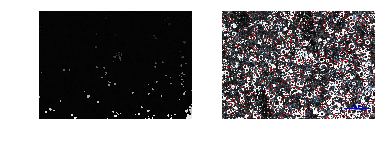

In [61]:
markersh = cv2.watershed(hierro,markersh)
hierro[markersh == -1] = [255,0,0]
subplot(121)
imshow(markersh)
axis('off')
subplot(122)
imshow(hierro)
axis('off')

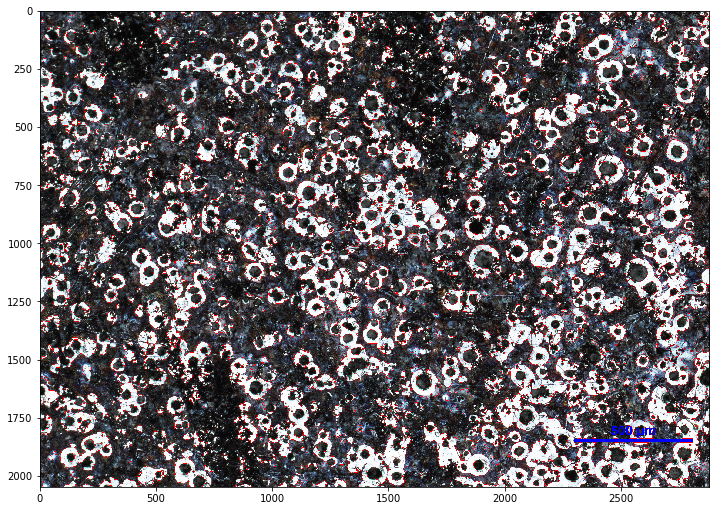

In [62]:
figure(figsize=(12,12))
imshow(hierro)

El resultado mejora levemente con respecto a la otra imagen. Esto se da debido a que los granos se distinguen más que lo que se aprecia en el primer caso. Sin embargo, el resultado obtenido sigue siendo inadecuado.

Para ilustrar mejor la transformada watershed, se usa como imagen de análisis una metalografía en donde loos granos están mejor definidos.

### Imagen de granos definidos<a name="septimo"></a>

(-0.5, 1019.5, 811.5, -0.5)

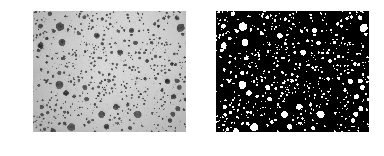

In [63]:
gran = cv2.imread('granos.PNG')
grang = cv2.cvtColor(gran,cv2.COLOR_BGR2GRAY)
ret, threshg = cv2.threshold(grang,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
subplot(121)
imshow(gran)
axis('off')
subplot(122)
imshow(threshg)
axis('off')


Teniendo la imagen binarizada, se procede a remover el ruido y delimitar cada una de las areas.

In [64]:
# noise removal
kernelg = np.ones((3,3),np.uint8)
openingg = cv2.morphologyEx(threshg,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bgg = cv2.dilate(openingg,kernelg,iterations=3)
# Finding sure foreground area
dist_transformg = cv2.distanceTransform(openingg,cv2.DIST_L2,5)
retg, sure_fgg = cv2.threshold(dist_transformg,0.005*dist_transformg.max(),255,0)
# Finding unknown region
sure_fgg = np.uint8(sure_fgg)
notsureg = cv2.subtract(sure_bgg,sure_fgg)

(-0.5, 1019.5, 811.5, -0.5)

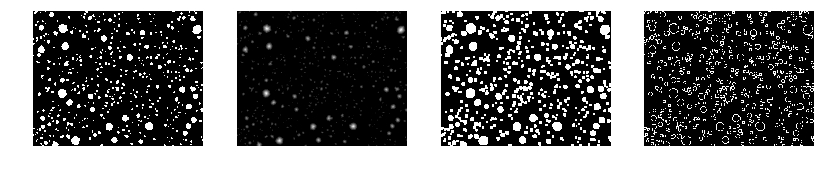

In [65]:
figure(figsize=(14,14))
subplot(141)
imshow(sure_fgg)
axis('off')
subplot(142)
imshow(dist_transformg)
axis('off')
subplot(143)
imshow(sure_bgg)
axis('off')
subplot(144)
imshow(notsureg)
axis('off')

En este caso, en comparación con los anteriores, sí se tiene una delimitación adecuada del foreground, background y área desconocida. Se procede a aplicar los marcadores y realizar la transformada. 

In [66]:
# Marker labelling
retg, markersg = cv2.connectedComponents(sure_bgg)
# Add one to all labels so that sure background is not 0, but 1
markersg = markersg+1
# Now, mark the region of unknown with zero
markersg[notsureg==255] = 0

(-0.5, 1019.5, 811.5, -0.5)

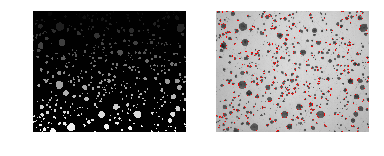

In [67]:
markersg = cv2.watershed(gran,markersg)
gran[markersg == -1] = [255,0,0]
subplot(121)
imshow(markersg)
axis('off')
subplot(122)
imshow(gran)
axis('off')

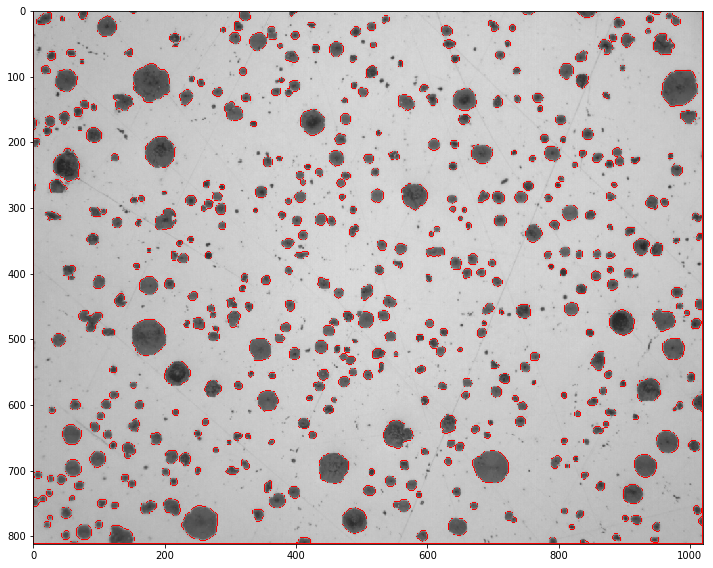

In [68]:
figure(figsize=(12,12))
imshow(gran)

Como se aprecia en la imagen, la transformada Watershed replica de manera adecuada los granos de la imagen, a excepción de algunos de menor tamaño que no son alcanzados a tener en cuenta. Sin embargo, a partir de esto, es posible realizar determinar los tamaños de los granos por medio de la transformada de Hough de la misma manera que fue realizado para los ejemplos anteriores.

In [69]:
gran[markersg == -1] = [255,255,255]
gran[markersg != -1] = [0,0,0]
grangc = color.rgb2grey(gran)

In [132]:
#Se guarda la imagen obtenida 
np.save('bordesg',gran)

NameError: name 'gran' is not defined

In [133]:
#Se carga la imagen recién guardada, con el fin de no tener que realizar todo el proceso anterior
cargar = np.load('bordesg.npy')
figure(figsize=(12,12))
imshow(cargar)

FileNotFoundError: [Errno 2] No such file or directory: 'bordesg.npy'

In [72]:
#Se pasa a escala de grises
cargar = color.rgb2grey(cargar)

In [91]:
# Se estima el rango de radios
hough_radiig = np.arange(5, 75, 1)
hough_resg = hough_circle(cargar, hough_radiig)

In [116]:
# Selecciono ALGUNOS los círculos
accumsg, cxg, cyg, radiig = hough_circle_peaks(hough_resg, hough_radiig,total_num_peaks=80)
#No se pudieron elegir todos lo picos porque al graficarlos, algunos se salían de la imagen.
#La siguiente imagen es sustentación de que el método funcionó, solo que no se pueden ver todos los circulos seleccionados.

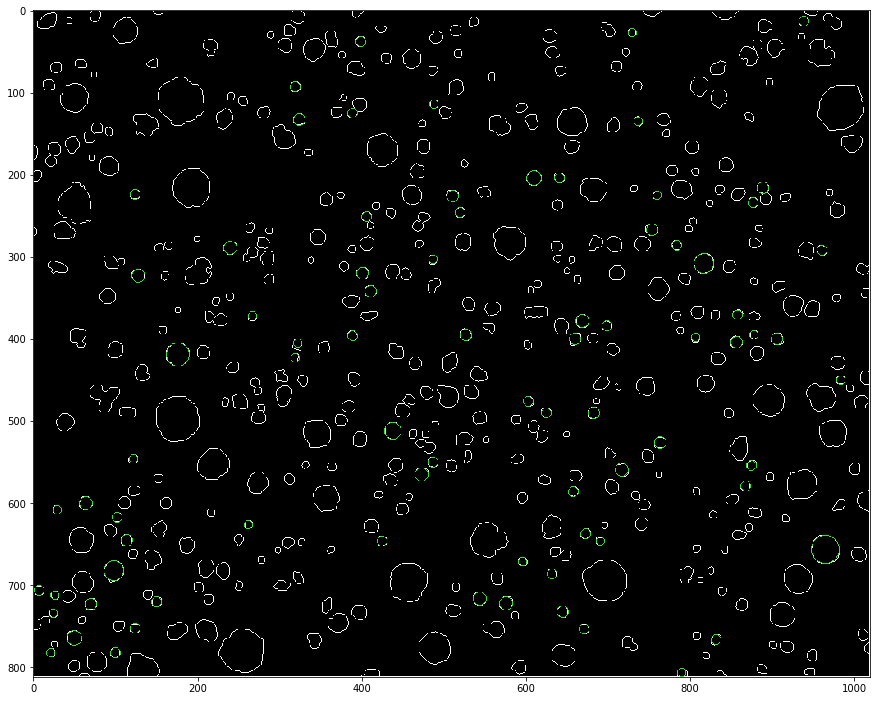

In [121]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 15))
imgg = color.gray2rgb(cargar)

for center_yg, center_xg, radiusg in zip(cyg, cxg, radiig):
    circyg, circxg = circle_perimeter(center_yg, center_xg, radiusg)
    imgg[circyg, circxg] = (220, 20, 220)    

ax.imshow(imgg, cmap=plt.cm.gray)
plt.show()

En el proceso recién realizado se toman 80 picos ya que, si se toman todos, algunos de los circulos calculados se salen de imagen, impidiendo graficarlos. Aunque no se detectan los granos de mayor tamaño, sí se obtienen resultados adecuados para los más pequeños. A partir de estos se procederá a determinar el histograma de la distribución de los tamaños de estos granos. 

In [119]:
# Asumiendo que lo anterior estaba bien (sustentado por la imagen anterior), selecciono TODOS los circulos
accumsgt, cxgt, cygt, radiigt = hough_circle_peaks(hough_resg, hough_radiig)
print(size(radiigt))

78669
